# Model

First, declare functions that will be used to analyse the variables and to create the model.

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
sb.set_theme()

data = pd.read_csv("../data/movies_with_vars.csv")

def performLinearRegression (data, predictor, response):
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)
    
    # Create a Linear Regression object
    linreg = LinearRegression()

    # Train the Linear Regression model
    linreg.fit(predictor_train, response_train)

    # Coefficients of the Linear Regression line
    b = linreg.intercept_
    a = linreg.coef_

    print('Intercept \t: b = ', b)
    print('Coefficients \t: a = ', a)
    print('R^2', linreg.score(predictor_train, response_train))

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(predictor_train, response_train)
    plt.plot(predictor_train, b + a * predictor_train, color = "red")
    plt.xlabel(predictor.columns[0])
    plt.ylabel(response.columns[0])
    plt.show()
    
    return linreg, predictor_train, predictor_test, response_train, response_test

def generateClassificationTree(data, predictorName,responseName, depth, class_names):
    print(f'{predictorName} vs. {responseName} with depth {depth}')
    response = pd.DataFrame(data[responseName]) # Response
    predictor = pd.DataFrame(data[predictorName]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a joint dataframe by concatenating Predictor and Response
    trainDF = pd.concat([predictor_train, response_train], axis = 1).reindex(predictor_train.index)

    # Joint Boxplot of Predictor Train against Response Train
    plt.figure(figsize=(12, 4))
    sb.swarmplot(x = predictorName, y = responseName, data = trainDF, orient = "h")

    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = depth)

    # Train the Decision Tree Classifier model
    dectree.fit(predictor, response)

    plt.figure(figsize=(16,16))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=[predictorName], 
          class_names=class_names)

    # Print the Classification Accuracy
    print("Train Classification Accuracy \t:", dectree.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", dectree.score(predictor_test, response_test))

    response_train_pred = dectree.predict(predictor_train)
    response_test_pred = dectree.predict(predictor_test)
    
    return {"response_train": response_train, "response_train_pred": response_train_pred, "response_test": response_test, "response_test_pred": response_test_pred}

def generateConfusionMatrix(response, response_pred, title):
    print(title)
    plt.figure(figsize=(6,6))
    plt.title(title)
    sb.heatmap(confusion_matrix(response, response_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
    # find false positive and false negative from confusion matrix
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(response, response_pred).ravel()
    print(f'True Positive Rate: {true_positive/(true_positive+false_negative)}')
    print(f'False Positive Rate: {false_positive/(false_positive+true_negative)}')
    print(f'True Negative Rate: {true_negative/(true_negative+false_positive)}')
    print(f'False Negative Rate: {false_negative/(false_negative+true_positive)}')
    
def generateRandomForestClassifier(data, predictor, response,n_estimators, depth, class_names):
    print(f'{predictor} vs. {response} with depth {depth}')
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a Decision Tree Classifier object
    random_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth = depth)

    # Train the Decision Tree Classifier model
    random_forest.fit(predictor_train, response_train)

    # Print the Train and Test Classification Accuracy
    print("Train Classification Accuracy \t:", random_forest.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", random_forest.score(predictor_test, response_test))

    response_train_pred = random_forest.predict(predictor_train)
    response_test_pred = random_forest.predict(predictor_test)

    return {"response_train": response_train, "response_train_pred": response_train_pred, "response_test": response_test, "response_test_pred": response_test_pred}
    

# Linear Regression

## Predictor vs. Vote Average

Intercept 	: b =  [6.42841644]
Coefficients 	: a =  [[0.17192817]]
R^2 0.0031939907431095538


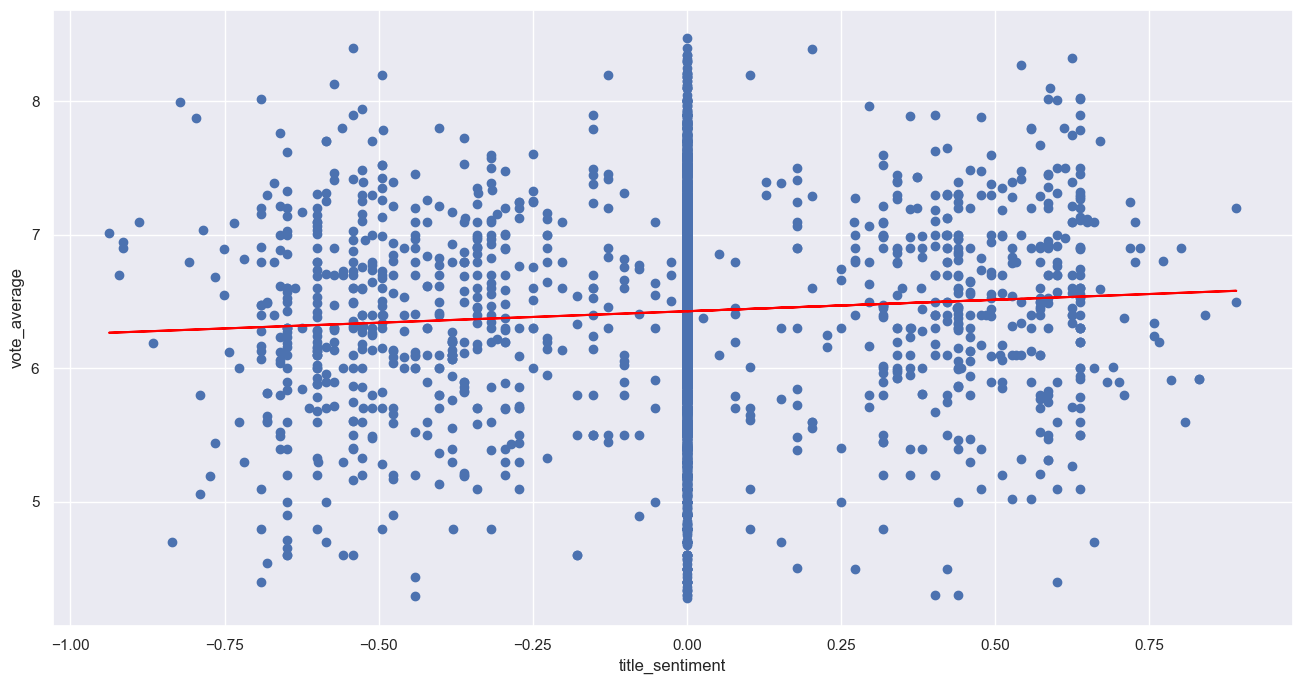

Intercept 	: b =  [6.43492454]
Coefficients 	: a =  [[0.1277252]]
R^2 0.011418413393856408


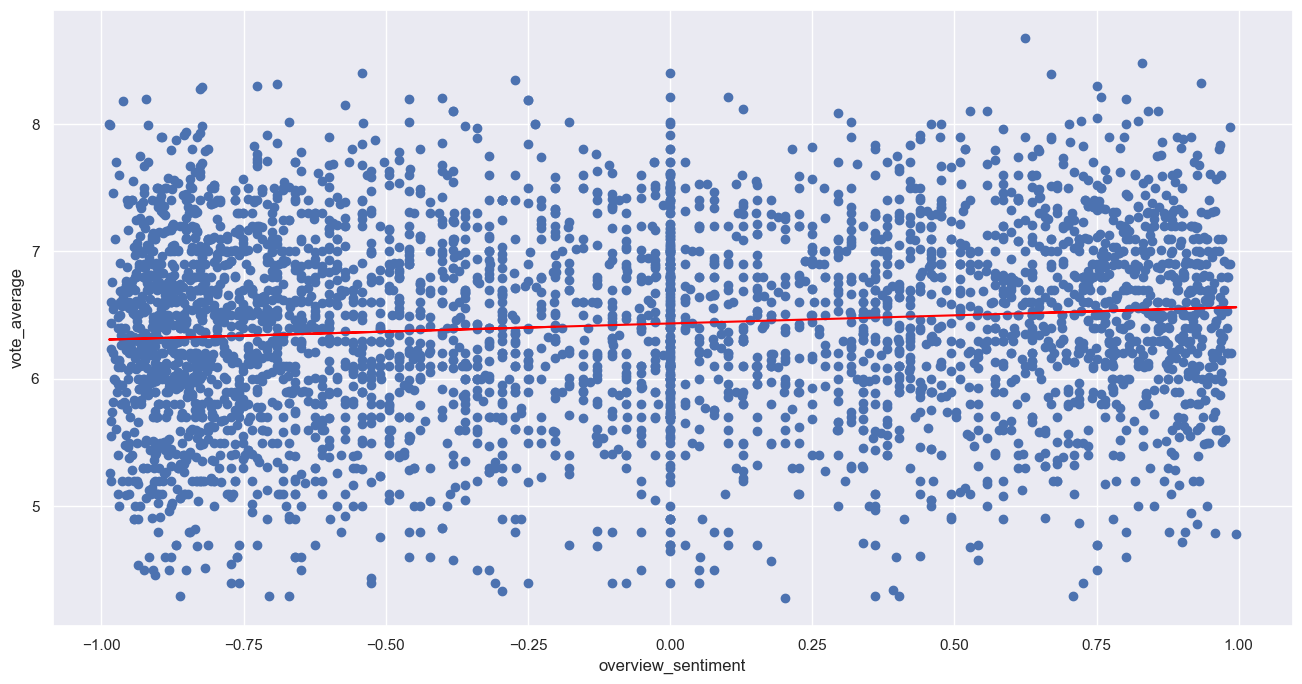

Intercept 	: b =  [6.30610728]
Coefficients 	: a =  [[0.00664573]]
R^2 0.007125162073214564


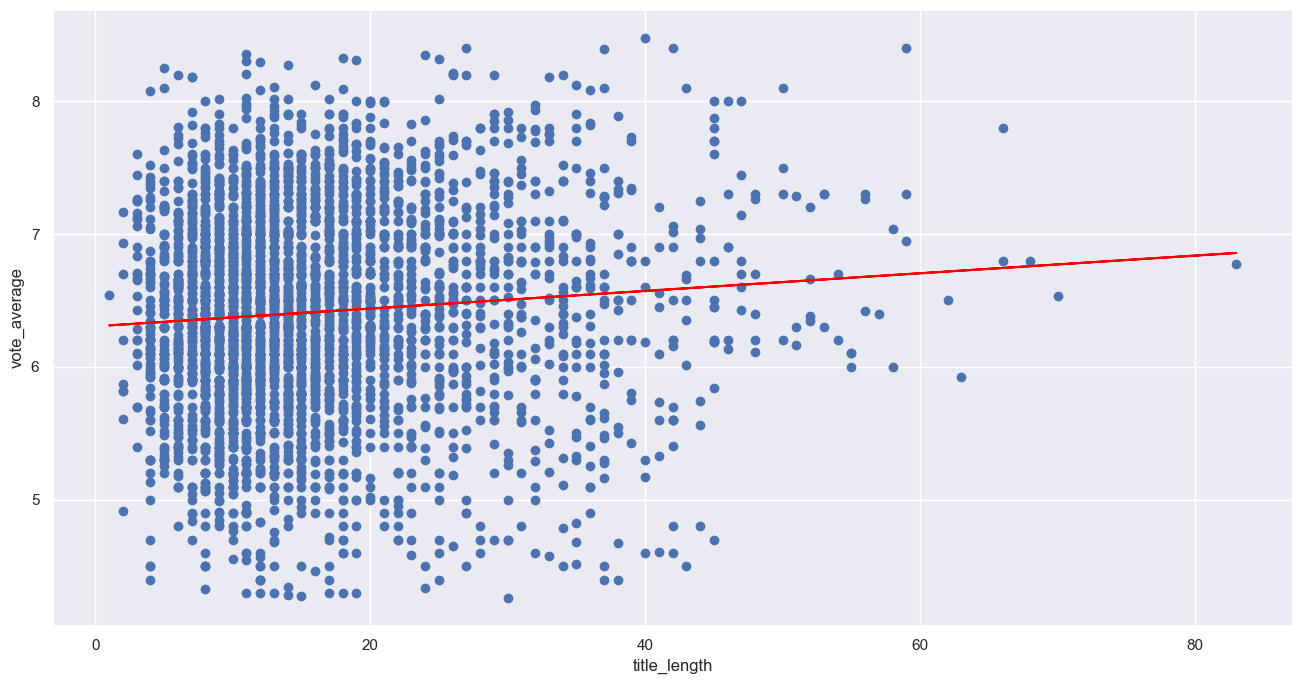

Intercept 	: b =  [6.34798003]
Coefficients 	: a =  [[0.02562042]]
R^2 0.0036661122316788974


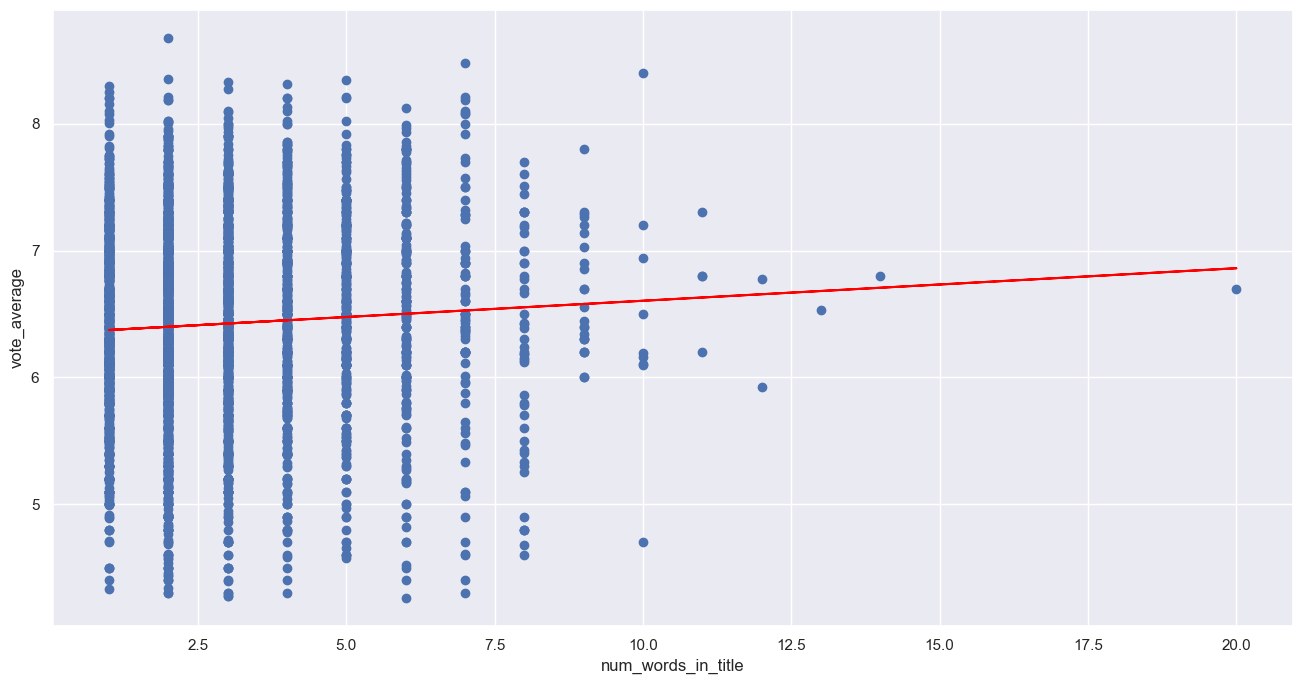

Intercept 	: b =  [6.4445963]
Coefficients 	: a =  [[-0.00607204]]
R^2 0.00020794254286182756


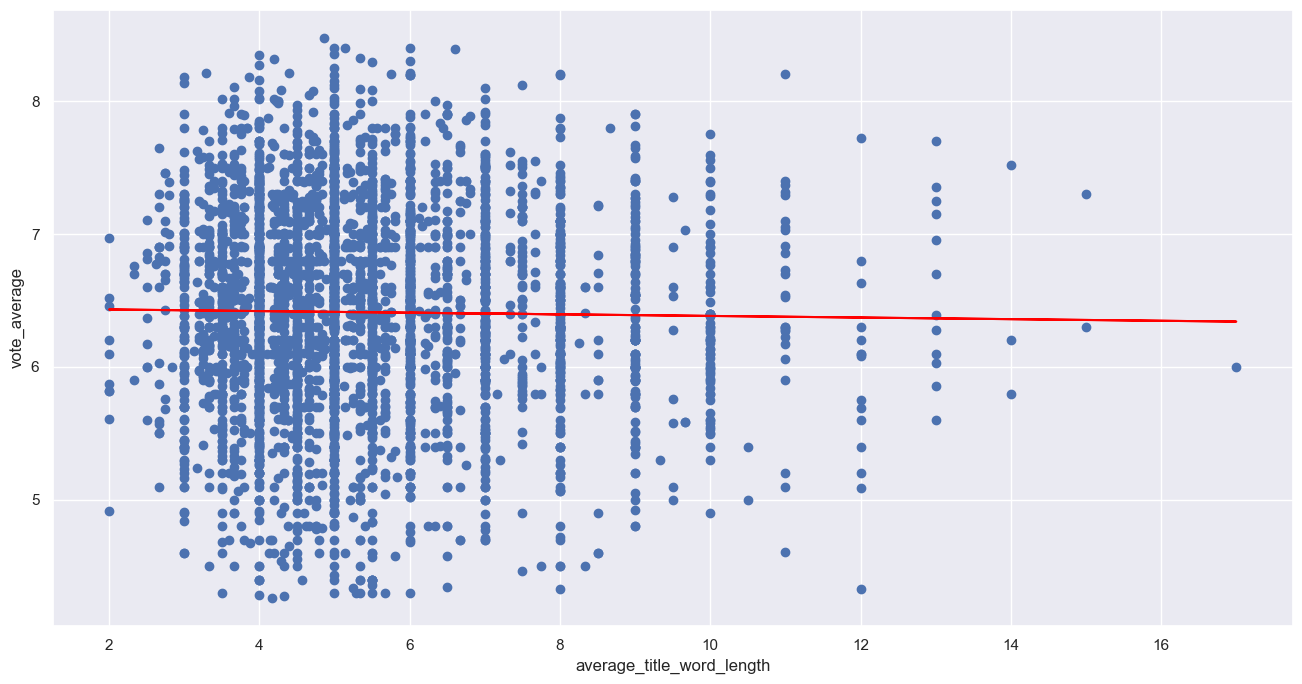

Intercept 	: b =  [6.40529629]
Coefficients 	: a =  [[0.11031385]]
R^2 0.0037650856132414035


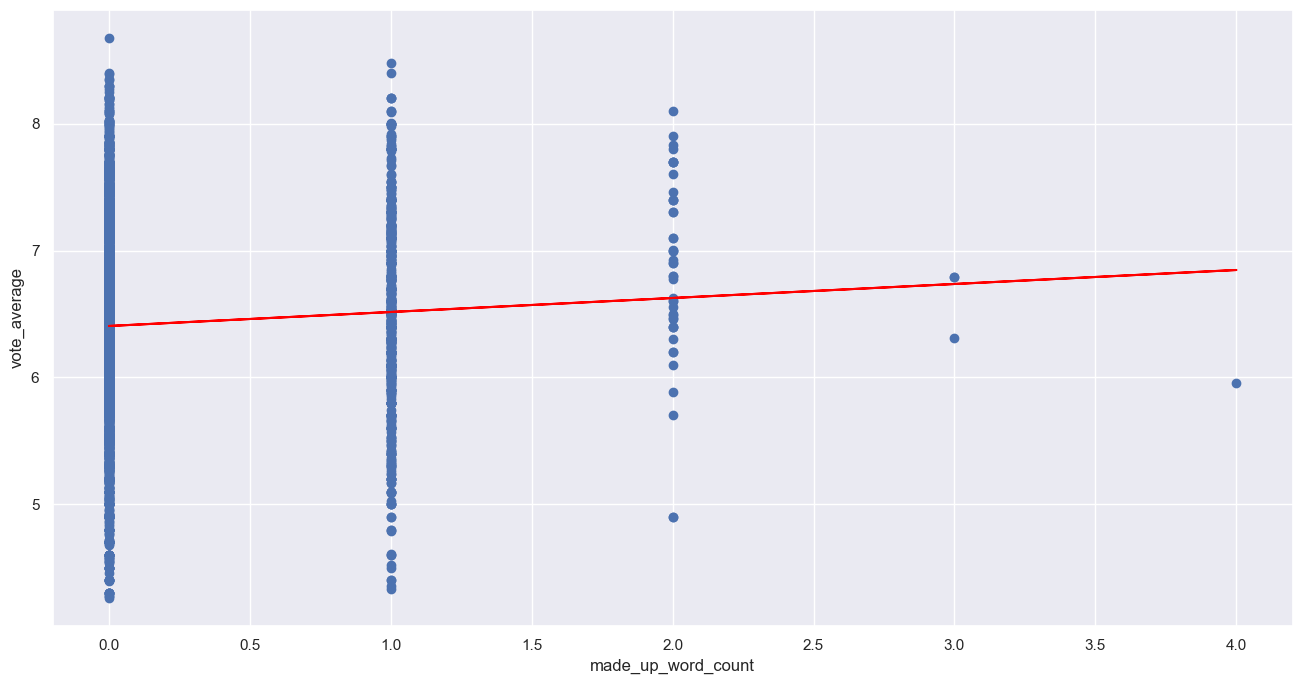

In [105]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'vote_average')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'vote_average')
title_length_linreg = performLinearRegression(data, 'title_length', 'vote_average')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'vote_average')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'vote_average')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'vote_average')

## Predictor vs. Popularity

Intercept 	: b =  [20.97599821]
Coefficients 	: a =  [[-0.04651969]]
R^2 3.7614311011457957e-06


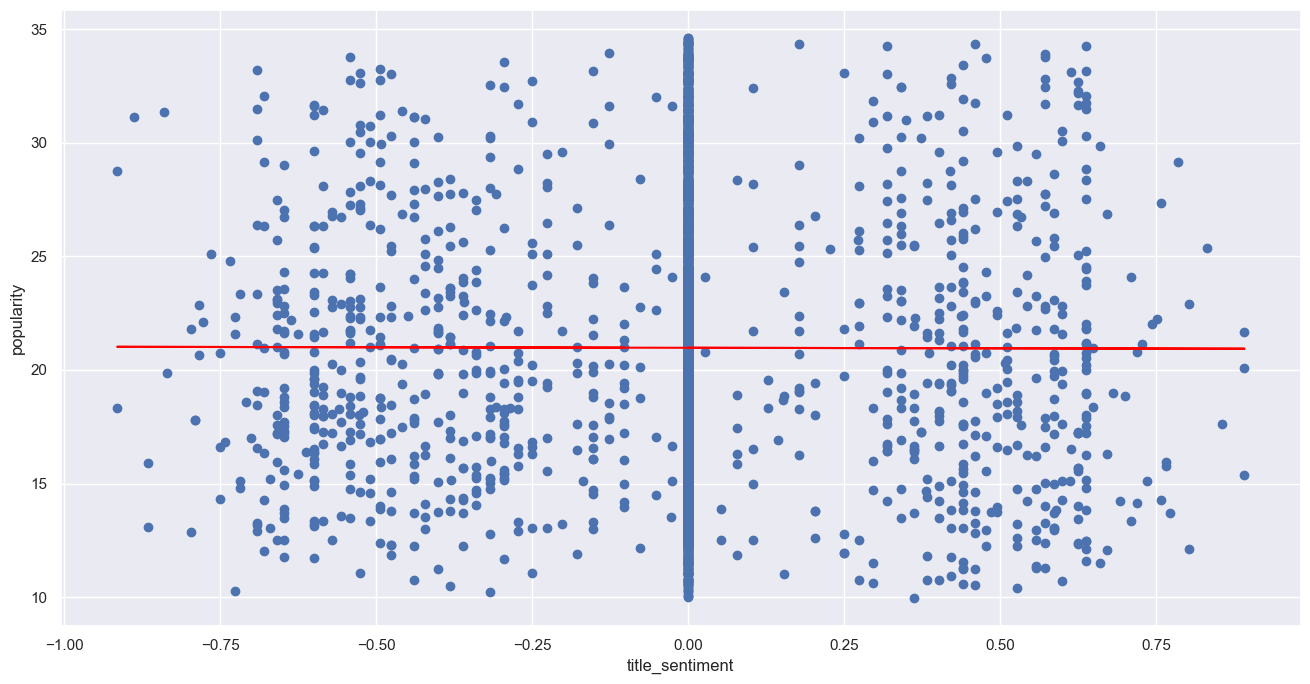

Intercept 	: b =  [20.90688924]
Coefficients 	: a =  [[-0.1497264]]
R^2 0.000261586443737416


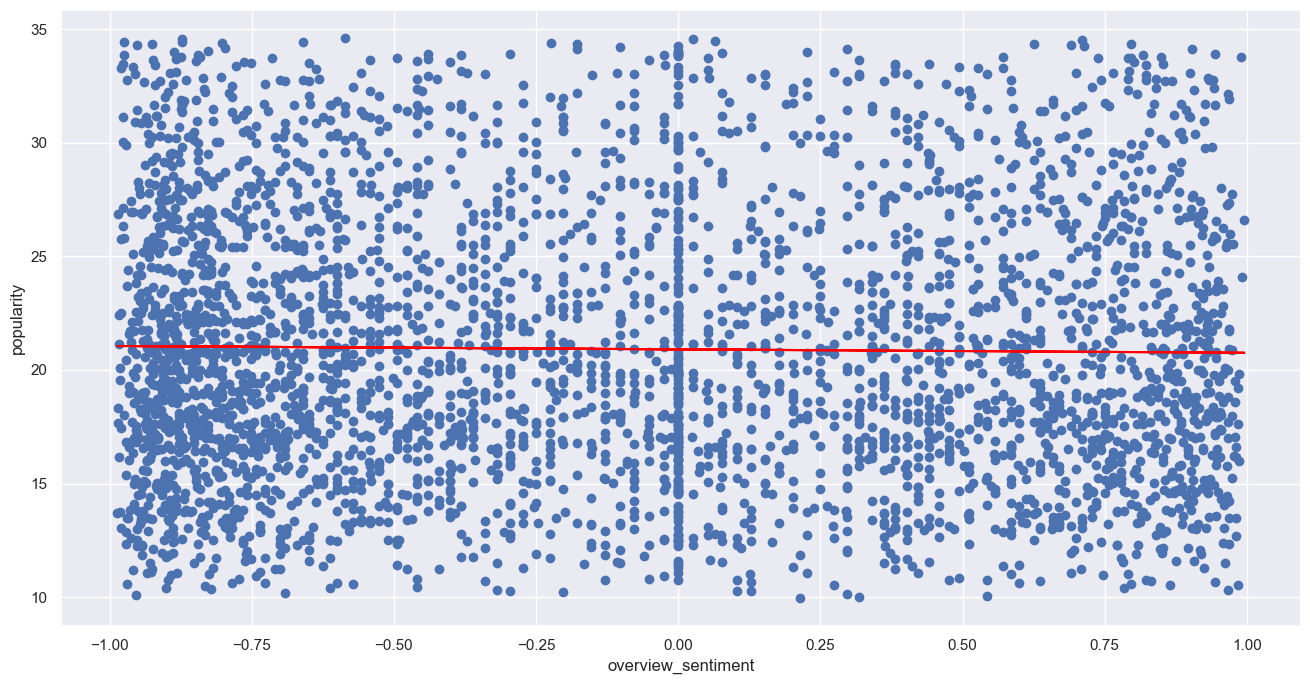

Intercept 	: b =  [20.88330097]
Coefficients 	: a =  [[0.00422874]]
R^2 4.793648095990921e-05


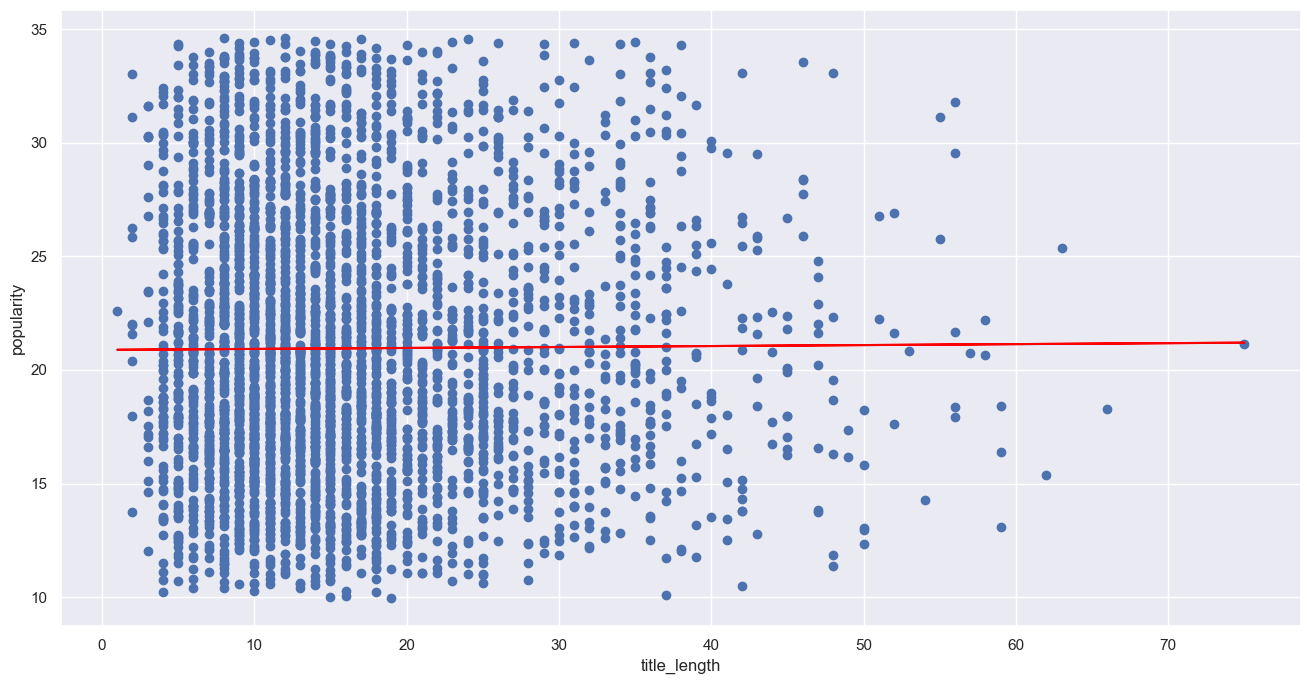

Intercept 	: b =  [21.27889751]
Coefficients 	: a =  [[-0.08467604]]
R^2 0.0006688353492334542


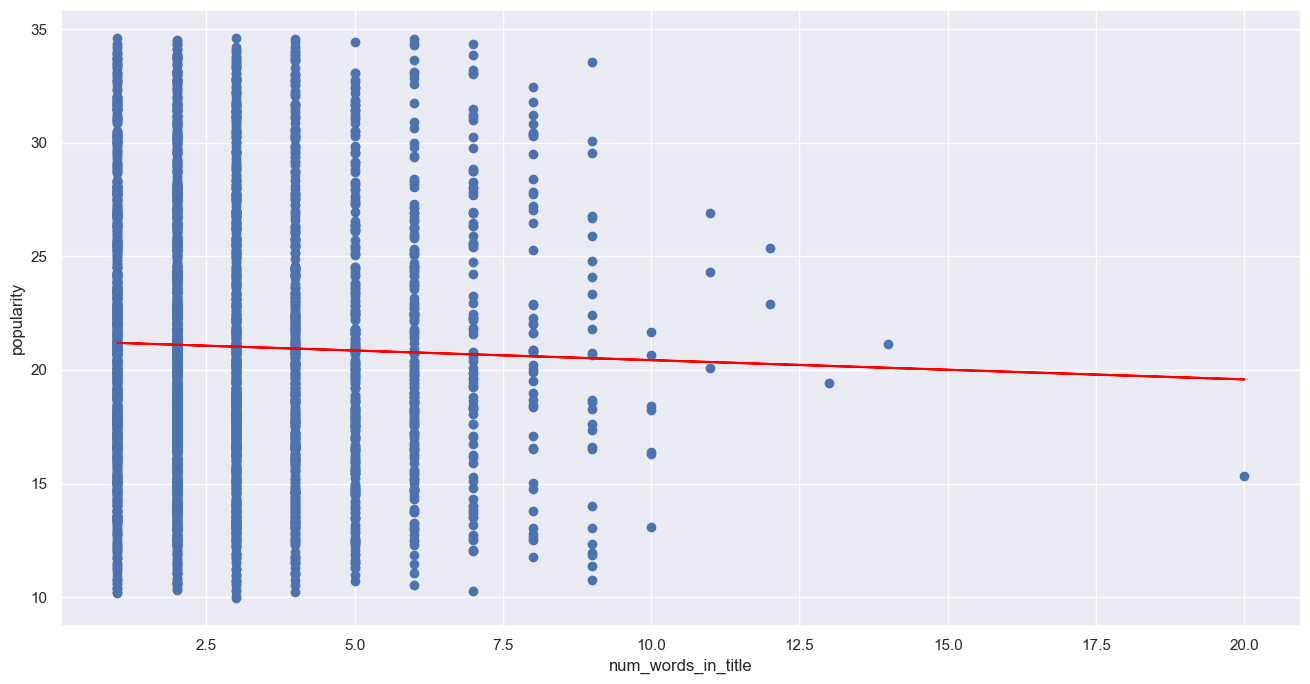

Intercept 	: b =  [20.51379796]
Coefficients 	: a =  [[0.08506453]]
R^2 0.0007061640874159725


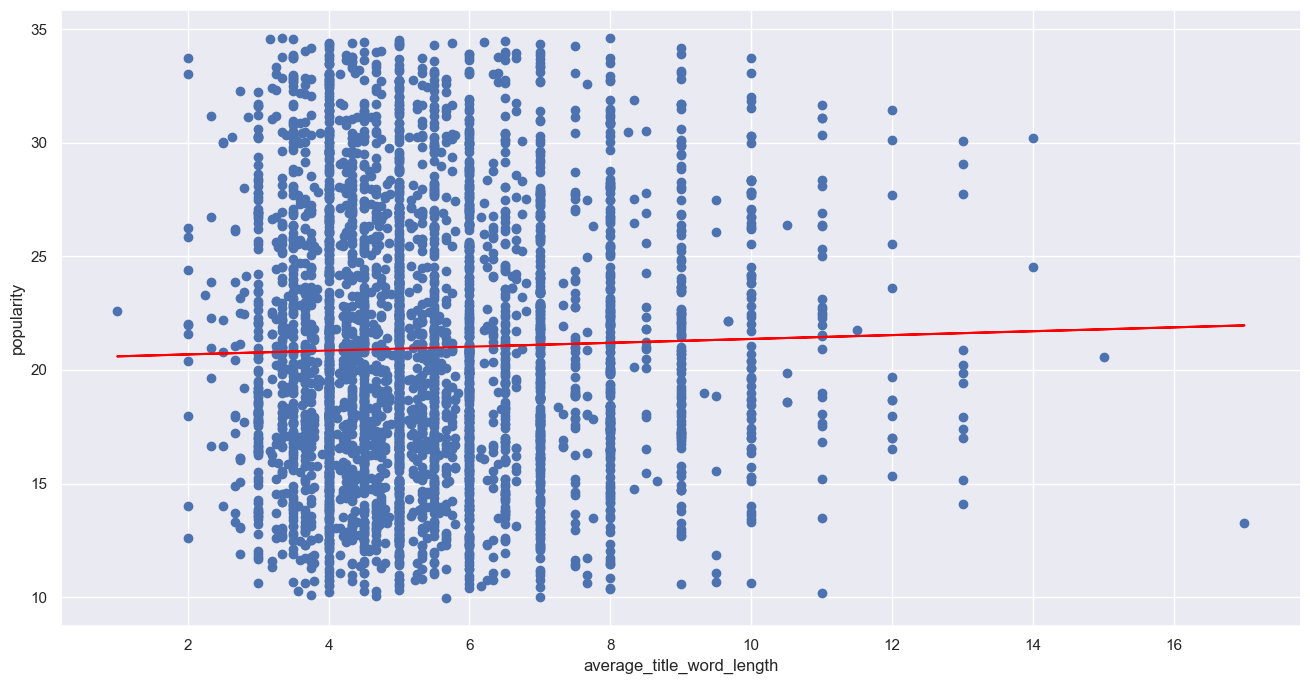

Intercept 	: b =  [21.06508497]
Coefficients 	: a =  [[0.0544475]]
R^2 1.5546395729093554e-05


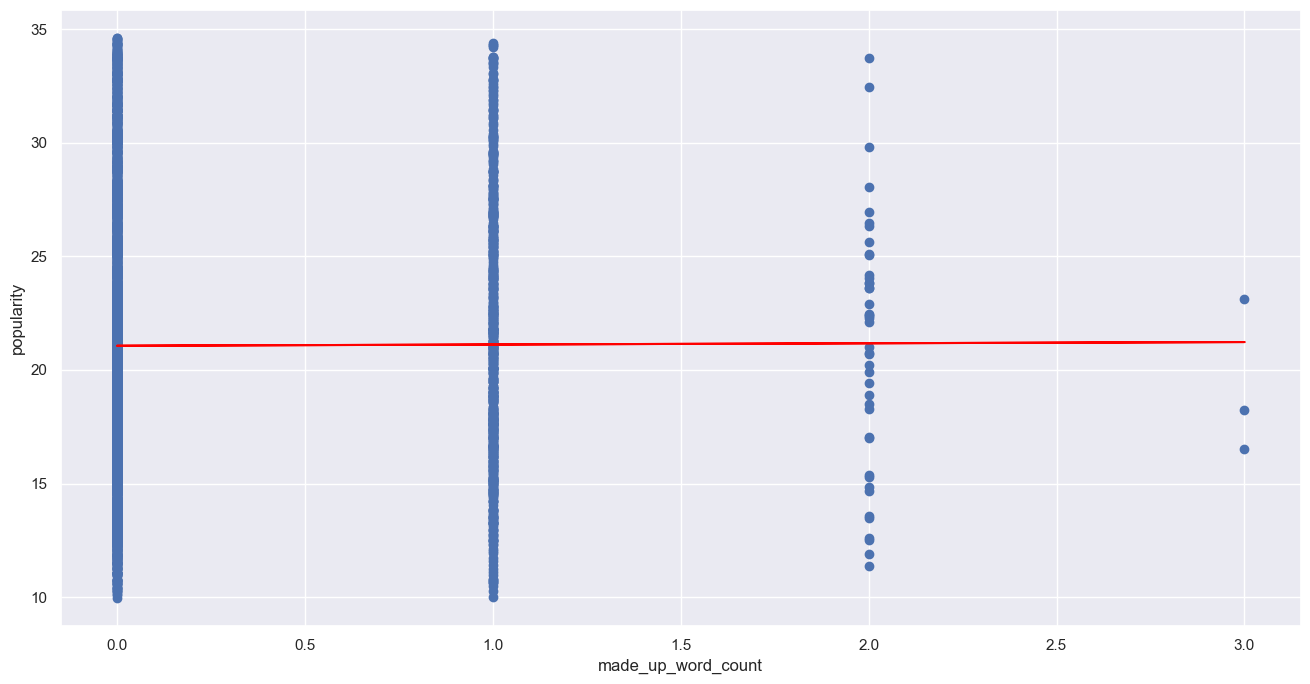

In [106]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'popularity')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'popularity')
title_length_linreg = performLinearRegression(data, 'title_length', 'popularity')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'popularity')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'popularity')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'popularity')

# Classification Tree

vote_average vs. has_made_up_word with depth 60


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Train Classification Accuracy 	: 0.8793503480278422
Test Classification Accuracy 	: 0.8832173240525909
Train Confusion Matrix
True Positive Rate: 0.29523809523809524
False Positive Rate: 0.007386888273314866
True Negative Rate: 0.9926131117266851
False Negative Rate: 0.7047619047619048
Test Confusion Matrix
True Positive Rate: 0.334841628959276
False Positive Rate: 0.0037313432835820895
True Negative Rate: 0.996268656716418
False Negative Rate: 0.665158371040724


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


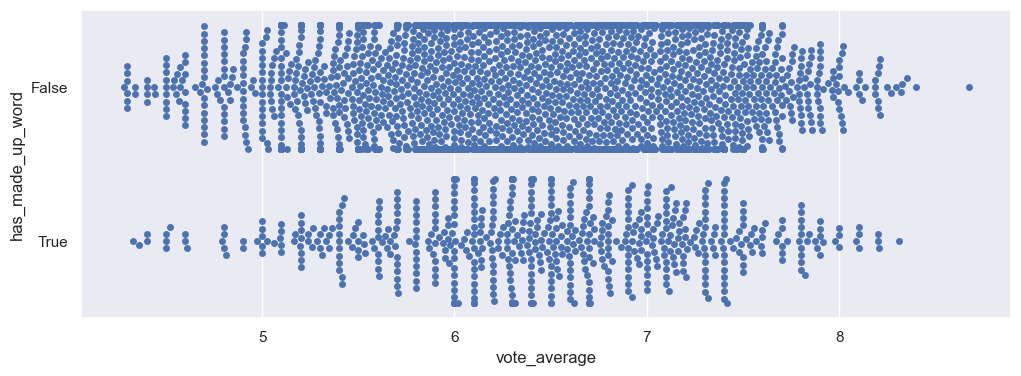

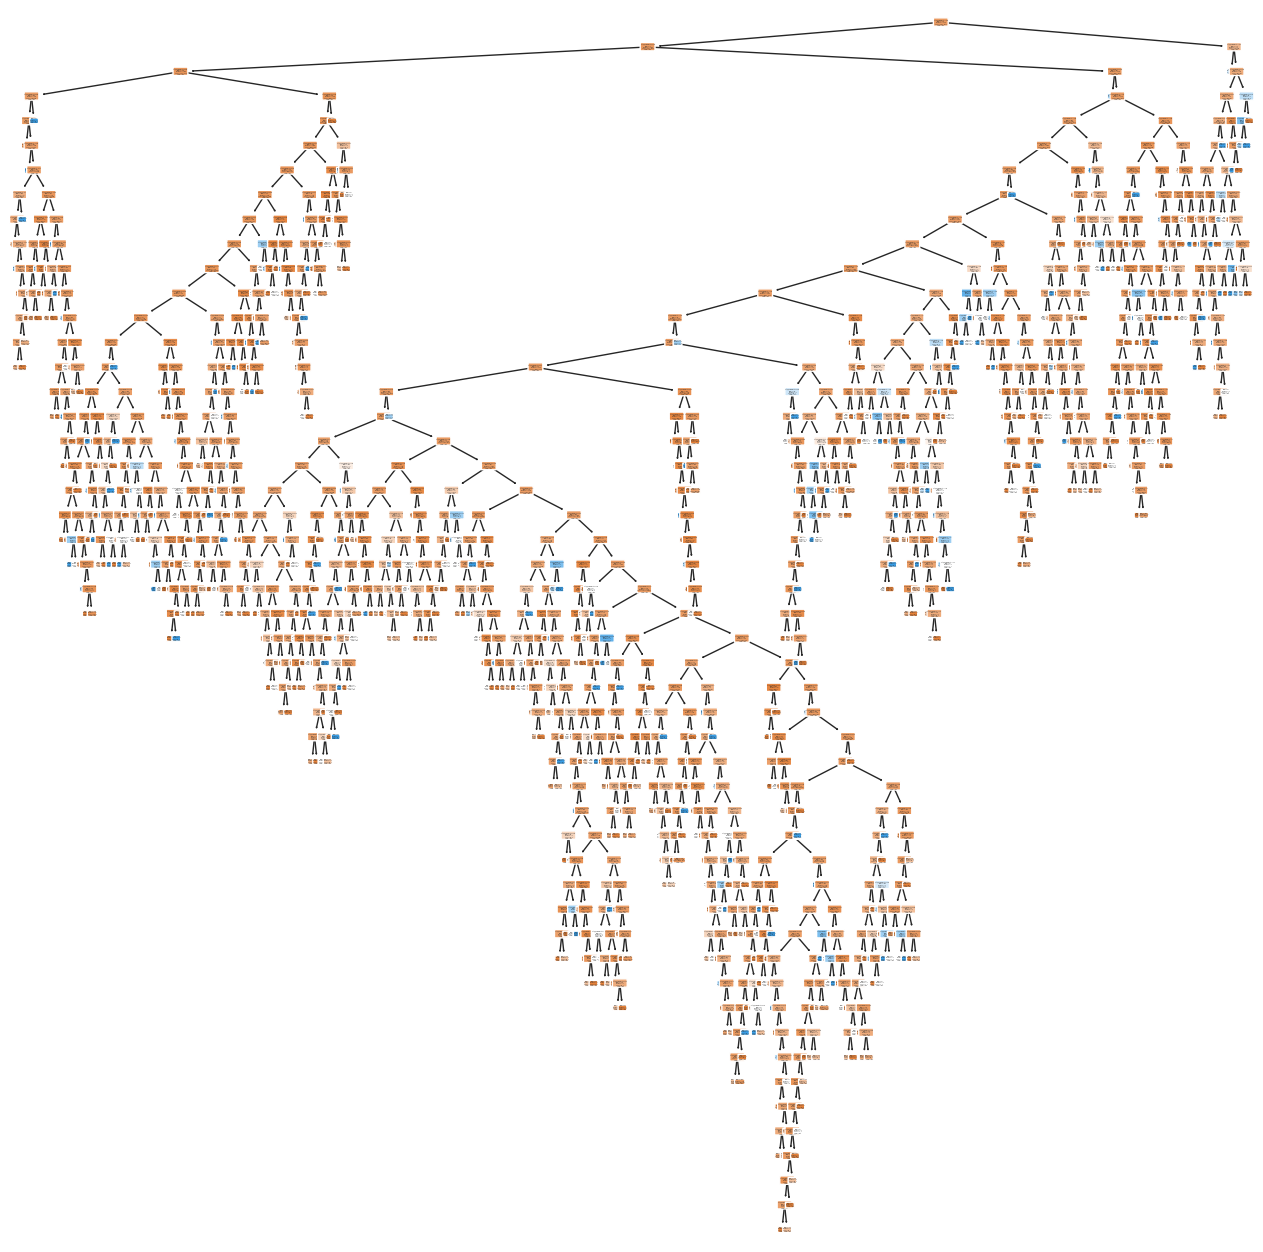

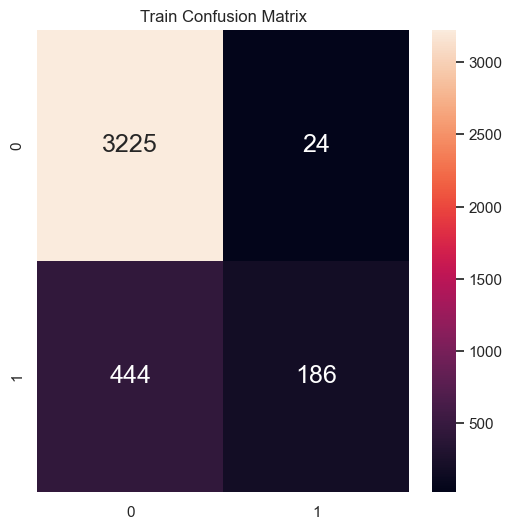

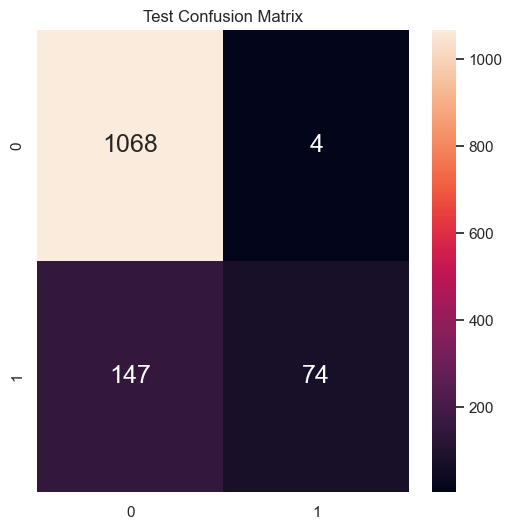

In [107]:
has_made_up_word_class_tree = generateClassificationTree(data,"vote_average",  "has_made_up_word", 60, ["No", "Yes"])
generateConfusionMatrix(has_made_up_word_class_tree['response_train'], has_made_up_word_class_tree['response_train_pred'], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_class_tree['response_test'], has_made_up_word_class_tree['response_test_pred'], "Test Confusion Matrix")

# Random Forest Classifier

vote_average vs. has_made_up_word with depth 80


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Classification Accuracy 	: 0.8837329208558907
Test Classification Accuracy 	: 0.8097447795823666
Train Confusion Matrix
True Positive Rate: 0.3613707165109034
False Positive Rate: 0.012666048810627124
True Negative Rate: 0.9873339511893728
False Negative Rate: 0.6386292834890965
Test Confusion Matrix
True Positive Rate: 0.15311004784688995
False Positive Rate: 0.06365313653136531
True Negative Rate: 0.9363468634686347
False Negative Rate: 0.84688995215311


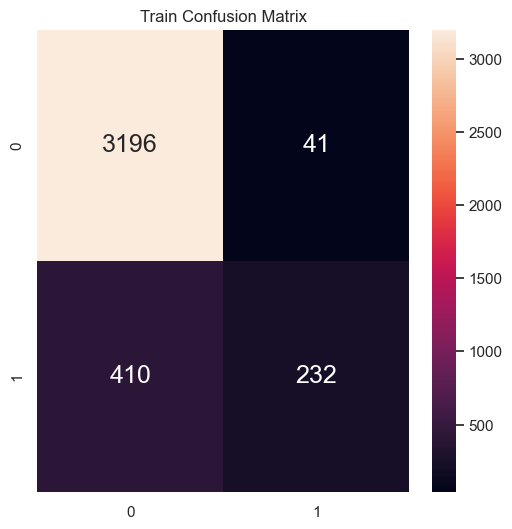

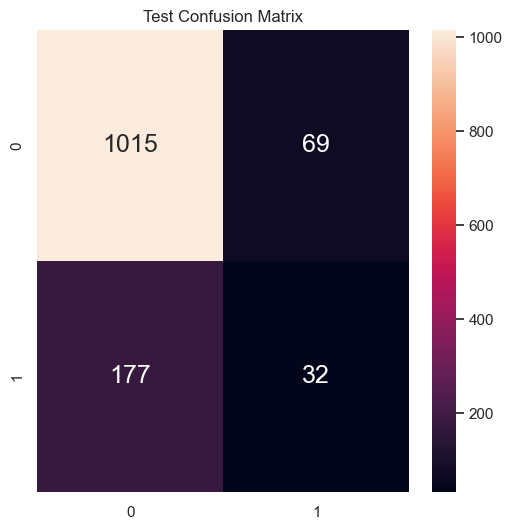

In [111]:
has_made_up_word_random_forest = generateRandomForestClassifier(data, "vote_average", "has_made_up_word", 150,80, ["No", "Yes"])
generateConfusionMatrix(has_made_up_word_random_forest['response_train'], has_made_up_word_random_forest['response_train_pred'], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_random_forest['response_test'], has_made_up_word_random_forest['response_test_pred'], "Test Confusion Matrix")